# GRIP AUGUST '21
# TSF-TASK 1-PREDICTION USING SUPERVISED ML
# NAME:AMRIN FATHIMA

# Importing libraries and reading data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Data has been loaded.

# DATA EXPLORATION

In [3]:
#Checking shape of data
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Checking the statistical info about the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Checking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#Checking for duplicate entries
data.duplicated().sum()

0

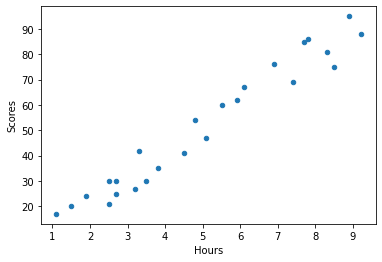

In [8]:
#Scatterplot
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

In [9]:
#looking for correlation
corr_matrix=data.corr()
corr_matrix['Scores'].sort_values(ascending=False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

There is a strong positive correlation between scores and hours studied.


<AxesSubplot:>

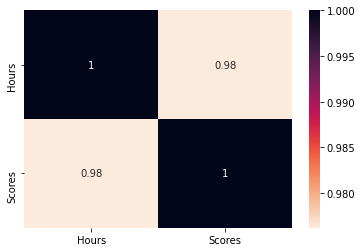

In [10]:
#Visulaising correlation using heatmap
import seaborn as sns
sns.heatmap(data.corr(),cmap='rocket_r',annot=True)

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting data into train and test data

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression

In [29]:
#Creating,Fitting model on train dataset and making predictions
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_train)

array([28.96850337, 34.77775026, 52.20549094, 39.61878934, 17.35000959,
       33.80954245, 46.39624405, 88.99738793, 85.12455667, 36.71416589,
       28.96850337, 21.22284085, 49.3008675 , 61.8875691 , 78.34710196,
       56.0783222 , 77.37889414, 13.47717832, 74.4742707 , 91.90201137])

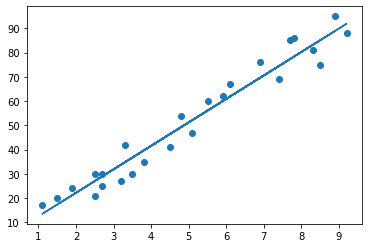

In [30]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [31]:
train_score = lin_reg.score(X_train, y_train)
print("The training score of model is: ", train_score)  

The training score of model is:  0.9491209376364416


In [32]:
test_score =lin_reg.score(X_test, y_test)
print("The score of the model on test data is:", test_score )

The score of the model on test data is: 0.9678055545167994


The model has a score of 0.9678 in test data set and 0.9491 in train dataset so overall we created a good model.

# Visualising the results

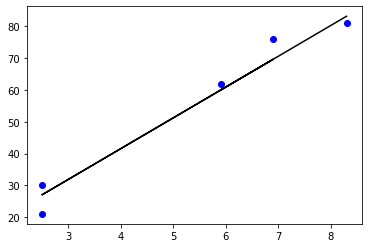

In [33]:
y_pred = lin_reg.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
plt.show() 

In [34]:
#Comparing Actual and Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [35]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


# What will be the predicted score if a student studies for 9.25 hrs/ day? 

In [36]:

hours = 9.25
hours=np.array(hours).reshape(1, -1)
own_pred = lin_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494
